In [ ]:
!unzip /content/drive/MyDrive/tree/json22000.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: 4989.json               
  inflating: 499.json                
  inflating: 4990.json               
  inflating: 4991.json               
  inflating: 4992.json               
  inflating: 4993.json               
  inflating: 4994.json               
  inflating: 4995.json               
  inflating: 4996.json               
  inflating: 4997.json               
  inflating: 4998.json               
  inflating: 4999.json               
  inflating: 5.json                  
  inflating: 50.json                 
  inflating: 500.json                
  inflating: 5000.json               
  inflating: 5001.json               
  inflating: 5002.json               
  inflating: 5003.json               
  inflating: 5004.json               
  inflating: 5005.json               
  inflating: 5006.json               
  inflating: 5007.json               
  inflating: 5008.json               
  inflating: 5009.json               
  inflating: 5

In [ ]:
!unzip /content/drive/MyDrive/tree/img22000.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: 5254.png                
  inflating: 5255.png                
  inflating: 5256.png                
  inflating: 5257.png                
  inflating: 5258.png                
  inflating: 5259.png                
  inflating: 526.png                 
  inflating: 5260.png                
  inflating: 5261.png                
  inflating: 5262.png                
  inflating: 5263.png                
  inflating: 5264.png                
  inflating: 5265.png                
  inflating: 5266.png                
  inflating: 5267.png                
  inflating: 5268.png                
  inflating: 5269.png                
  inflating: 5270.png                
  inflating: 5271.png                
  inflating: 5272.png                
  inflating: 5273.png                
  inflating: 5274.png                
  inflating: 5275.png                
  inflating: 5276.png                
  inflating: 5277.png                
  inflating: 5

In [ ]:
import zipfile

# json파일 list
json_zip = zipfile.ZipFile('/content/drive/MyDrive/tree/json22000.zip')
json_zip_list = zipfile.ZipFile.namelist(json_zip)
print(len(json_zip_list))

# img파일 list
img_zip = zipfile.ZipFile('/content/drive/MyDrive/tree/img22000.zip')
img_zip_list = zipfile.ZipFile.namelist(img_zip)
print(len(img_zip_list))

10080
18118


img 파일 개수와 json 파일 개수가 다름
 
확인 필요!!

# 라벨링 결과 dataframe으로 생성

In [ ]:
import json
import pandas as pd

In [ ]:
# json 파일에서 flags와 imagepath를 배열로 가져옴

result = []

for j_file in json_zip_list:
  with open(j_file) as f:
    json_data = json.load(f)
    label = list(json_data['flags'].values())
    img_path = json_data['imagePath']
    img_path = img_path.replace('.png', '')
    label.append(img_path)

  result.append(label)

col = json_data['flags'].keys()
col = list(col)
col.append('img_path')
col

df = pd.DataFrame(data=result, columns=col)
df

root  branch  fruit  leaves   knot  willow keyhole img_path
0      False   False  False    True  False   False   False        0
1      False    True  False    True  False   False   False        1
2      False   False  False    True  False   False   False       10
3      False   False  False    True  False   False   False      100
4      False   False  False    True  False   False   False   100000
...      ...     ...    ...     ...    ...     ...     ...      ...
10075  False   False  False    True  False   False   False     9995
10076  False   False  False    True  False   False   False     9996
10077   True   False  False    True  False   False   False     9997
10078  False   False  False    True  False   False   False     9998
10079  False   False  False    True  False   False   False     9999

[10080 rows x 8 columns]

In [ ]:
df.dtypes

root          bool
branch        bool
fruit         bool
leaves        bool
knot          bool
willow        bool
keyhole     object
img_path    object
dtype: object

In [ ]:
df = df[df['img_path'].isna()==False]
df

root  branch  fruit  leaves   knot  willow keyhole  img_path
0      False   False  False    True  False   False   False       0.0
1      False    True  False    True  False   False   False       1.0
2      False   False  False    True  False   False   False      10.0
3      False   False  False    True  False   False   False     100.0
4      False   False  False    True  False   False   False  100000.0
...      ...     ...    ...     ...    ...     ...     ...       ...
10075  False   False  False    True  False   False   False    9995.0
10076  False   False  False    True  False   False   False    9996.0
10077   True   False  False    True  False   False   False    9997.0
10078  False   False  False    True  False   False   False    9998.0
10079  False   False  False    True  False   False   False    9999.0

[10039 rows x 8 columns]

In [ ]:
df['img_path'] = df['img_path'].apply(np.int64)

# 확인
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


root          bool
branch        bool
fruit         bool
leaves        bool
knot          bool
willow        bool
keyhole     object
img_path     int64
dtype: object

In [ ]:
remove_list = list(range(4000, 6000))
remove_list2 = df[df['img_path'].isin(remove_list)].set_index('img_path').index
remove_list2

Int64Index([4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010,
            ...
            5990, 5991, 5992, 5993, 5994, 5995, 5996, 5997, 5998, 5999],
           dtype='int64', name='img_path', length=1928)

In [ ]:
re_df = df.set_index('img_path').drop(remove_list2, axis=0)

In [ ]:
re_df

root  branch  fruit  leaves   knot  willow keyhole
img_path                                                     
0         False   False  False    True  False   False   False
1         False    True  False    True  False   False   False
10        False   False  False    True  False   False   False
100       False   False  False    True  False   False   False
100000    False   False  False    True  False   False   False
...         ...     ...    ...     ...    ...     ...     ...
9995      False   False  False    True  False   False   False
9996      False   False  False    True  False   False   False
9997       True   False  False    True  False   False   False
9998      False   False  False    True  False   False   False
9999      False   False  False    True  False   False   False

[8111 rows x 7 columns]

In [ ]:
len(re_df[(re_df['willow']==True) & (re_df['leaves']==True)])

0

In [ ]:
print(len(re_df[(re_df['keyhole']==True) & (re_df['root']==True)]))
print(len(re_df[(re_df['keyhole']==True) & (re_df['branch']==True)]))
print(len(re_df[(re_df['keyhole']==True) & (re_df['leaves']==True)]))
print(len(re_df[(re_df['keyhole']==True) & (re_df['fruit']==True)]))
print(len(re_df[(re_df['keyhole']==True) & (re_df['knot']==True)]))

0
0
0
0
0


# 오버 샘플링

In [ ]:
# 필요 모듈 임포트
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

In [ ]:
print(sum(re_df['willow']==True))
print(sum(re_df['keyhole']==True))
print(sum(re_df['root']==True))

16
224
1971


In [ ]:
import numpy as np

re_df['class'] = np.where(re_df['willow']==True, 1, 
                       np.where(re_df['keyhole']==True, 2, 
                                np.where(re_df['root']==True, 3, 4)))
re_df

root  branch  fruit  leaves   knot  willow keyhole  class
img_path                                                            
0         False   False  False    True  False   False   False      4
1         False    True  False    True  False   False   False      4
10        False   False  False    True  False   False   False      4
100       False   False  False    True  False   False   False      4
100000    False   False  False    True  False   False   False      4
...         ...     ...    ...     ...    ...     ...     ...    ...
9995      False   False  False    True  False   False   False      4
9996      False   False  False    True  False   False   False      4
9997       True   False  False    True  False   False   False      3
9998      False   False  False    True  False   False   False      4
9999      False   False  False    True  False   False   False      4

[8111 rows x 8 columns]

In [ ]:
# 확인 과정
print(sum(re_df['class']==1))
print(sum(re_df['class']==2))
print(sum(re_df['class']==3))
print(sum(re_df['class']==4))

16
224
1971
5900


In [ ]:
re_df.replace({True:1, False:0}, inplace=True)
re_df

root  branch  fruit  leaves  knot  willow  keyhole  class
img_path                                                           
0            0       0      0       1     0       0        0      4
1            0       1      0       1     0       0        0      4
10           0       0      0       1     0       0        0      4
100          0       0      0       1     0       0        0      4
100000       0       0      0       1     0       0        0      4
...        ...     ...    ...     ...   ...     ...      ...    ...
9995         0       0      0       1     0       0        0      4
9996         0       0      0       1     0       0        0      4
9997         1       0      0       1     0       0        0      3
9998         0       0      0       1     0       0        0      4
9999         0       0      0       1     0       0        0      4

[8111 rows x 8 columns]

In [ ]:
re_df['root'] = re_df['root'].astype('category')
re_df['branch'] = re_df['branch'].astype('category')
re_df['fruit'] = re_df['fruit'].astype('category')
re_df['leaves'] = re_df['leaves'].astype('category')
re_df['knot'] = re_df['knot'].astype('category')
re_df['willow'] = re_df['willow'].astype('category')
re_df['keyhole'] = re_df['keyhole'].astype('category')
re_df['class'] = re_df['class'].astype('category')

re_df.dtypes

root       category
branch     category
fruit      category
leaves     category
knot       category
willow     category
keyhole    category
class      category
dtype: object

In [ ]:
data = re_df.values
data

array([[0, 0, 0, ..., 0, 0, 4],
       [0, 1, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 4],
       ...,
       [1, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 4]])

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
print(X)
print(y)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[4 4 4 ... 3 4 4]


## SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=4, n=5900 (25.000%)
Class=3, n=5900 (25.000%)
Class=1, n=5900 (25.000%)
Class=2, n=5900 (25.000%)


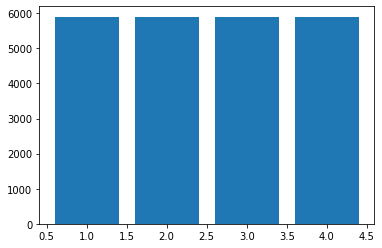

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X, y)
count_and_plot(y_resampled)

In [ ]:
X_resampled

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [ ]:
col = ['root', 'branch', 'fruit', 'leaves', 'knot', 'willow', 'keyhole']
df_smote = pd.DataFrame(data=X_resampled, columns=col)
df_smote

root  branch  fruit  leaves  knot  willow  keyhole
0         0       0      0       1     0       0        0
1         0       1      0       1     0       0        0
2         0       0      0       1     0       0        0
3         0       0      0       1     0       0        0
4         0       0      0       1     0       0        0
...     ...     ...    ...     ...   ...     ...      ...
23595     1       1      0       1     0       0        0
23596     1       0      0       1     0       0        0
23597     1       0      0       1     0       0        0
23598     1       0      1       1     0       0        0
23599     1       1      0       1     0       0        0

[23600 rows x 7 columns]

In [ ]:
df_smote.dtypes

root       int64
branch     int64
fruit      int64
leaves     int64
knot       int64
willow     int64
keyhole    int64
dtype: object

In [ ]:
df_smote.apply(lambda x: len(x.unique()), axis=0)

root       2
branch     2
fruit      2
leaves     2
knot       2
willow     2
keyhole    2
dtype: int64

In [ ]:
print(sum(df_smote['willow']==1))
print(sum(df_smote['willow']==0))

5900
17700


In [ ]:
print(sum(df_smote['root']==1))
print(sum(df_smote['root']==0))

5900
17700


In [ ]:
print(sum(df_smote['keyhole']==1))
print(sum(df_smote['keyhole']==0))
print(sum((df_smote['keyhole'] != 0) & (df_smote['keyhole'] != 1)))

5900
17700
0


In [ ]:
# df_smote['keyhole'] = np.where((df_smote['keyhole'] != 0) & (df_smote['keyhole'] != 1),
#                                0,
#                                df_smote['keyhole'])

# print(sum(df_smote['keyhole']==1))
# print(sum(df_smote['keyhole']==0))
# print(sum((df_smote['keyhole'] != 0) & (df_smote['keyhole'] != 1)))

7783
23349
0


In [ ]:
df_smote

root  branch  fruit  leaves  knot  willow  keyhole
0         0       0      0       1     0       0        0
1         0       1      0       1     0       0        0
2         0       0      0       1     0       0        0
3         0       0      0       1     0       0        0
4         0       0      0       1     0       0        0
...     ...     ...    ...     ...   ...     ...      ...
23595     1       1      0       1     0       0        0
23596     1       0      0       1     0       0        0
23597     1       0      0       1     0       0        0
23598     1       0      1       1     0       0        0
23599     1       1      0       1     0       0        0

[23600 rows x 7 columns]

In [ ]:
df_smote.to_excel('/content/drive/MyDrive/tree/smote_over_sampling.xlsx', index=False)

### img_path 처리작업

In [ ]:
df_smote = pd.read_excel('/content/drive/MyDrive/tree/smote_over_sampling.xlsx')
df_smote

root  branch  fruit  leaves  knot  willow  keyhole
0         0       0      0       1     0       0        0
1         0       1      0       1     0       0        0
2         0       0      0       1     0       0        0
3         0       0      0       1     0       0        0
4         0       0      0       1     0       0        0
...     ...     ...    ...     ...   ...     ...      ...
30999     1       0      0       1     0       0        0
31000     1       1      0       1     0       0        0
31001     1       1      0       1     0       0        0
31002     1       0      0       1     0       0        0
31003     1       0      0       1     0       0        0

[31004 rows x 7 columns]

In [ ]:
import numpy as np

df_smote['class'] = np.where(df_smote['willow']==1, 1, 
                       np.where(df_smote['keyhole']==1, 2, 
                                np.where(df_smote['root']==1, 3, 4)))
df_smote

root  branch  fruit  leaves  knot  willow  keyhole  class
0         0       0      0       1     0       0        0      4
1         0       1      0       1     0       0        0      4
2         0       0      0       1     0       0        0      4
3         0       0      0       1     0       0        0      4
4         0       0      0       1     0       0        0      4
...     ...     ...    ...     ...   ...     ...      ...    ...
23595     1       1      0       1     0       0        0      3
23596     1       0      0       1     0       0        0      3
23597     1       0      0       1     0       0        0      3
23598     1       0      1       1     0       0        0      3
23599     1       1      0       1     0       0        0      3

[23600 rows x 8 columns]

In [ ]:
# 확인 과정
print(sum(df_smote['class']==1))  #willow
print(sum(df_smote['class']==2))  #keyhole
print(sum(df_smote['class']==3))  #root
print(sum(df_smote['class']==4))  #그외

5900
5900
5900
5900


In [ ]:
willow_img_path = re_df[re_df['class']==1].index
keyhole_img_path = re_df[re_df['class']==2].index

In [ ]:
re_df[(re_df.sum(axis=1) != 2) & (re_df['class']==1)]  #없으니 올바르게 가고 있는 것이 맞음

Empty DataFrame
Columns: [root, branch, fruit, leaves, knot, willow, keyhole, class]
Index: []

In [ ]:
re_df[(re_df.sum(axis=1) != 3) & (re_df['class']==2)]  #없으니 올바르게 가고 있는 것이 맞음

Empty DataFrame
Columns: [root, branch, fruit, leaves, knot, willow, keyhole, class]
Index: []

#### willow

In [ ]:
df_smote_willow = df_smote[df_smote['class']==1]
df_smote_willow

root  branch  fruit  leaves  knot  willow  keyhole  class
89        0       0      0       0     0       1        0      1
90        0       0      0       0     0       1        0      1
92        0       0      0       0     0       1        0      1
93        0       0      0       0     0       1        0      1
94        0       0      0       0     0       1        0      1
...     ...     ...    ...     ...   ...     ...      ...    ...
13990     0       0      0       0     0       1        0      1
13991     0       0      0       0     0       1        0      1
13992     0       0      0       0     0       1        0      1
13993     0       0      0       0     0       1        0      1
13994     0       0      0       0     0       1        0      1

[5900 rows x 8 columns]

In [ ]:
np.random.seed(0)

df_smote_willow['img_path'] = np.random.choice(willow_img_path, 5900, replace=True)
df_smote_willow

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


root  branch  fruit  leaves  knot  willow  keyhole  class  img_path
89        0       0      0       0     0       1        0      1      2122
90        0       0      0       0     0       1        0      1       919
92        0       0      0       0     0       1        0      1    100332
93        0       0      0       0     0       1        0      1    100310
94        0       0      0       0     0       1        0      1    100321
...     ...     ...    ...     ...   ...     ...      ...    ...       ...
13990     0       0      0       0     0       1        0      1     16957
13991     0       0      0       0     0       1        0      1    100332
13992     0       0      0       0     0       1        0      1    100321
13993     0       0      0       0     0       1        0      1      3542
13994     0       0      0       0     0       1        0      1    100347

[5900 rows x 9 columns]

#### keyhole

In [ ]:
df_smote_keyhole = df_smote[df_smote['class']==2]

np.random.seed(0)
df_smote_keyhole['img_path'] = np.random.choice(keyhole_img_path, 5900, replace=True)
df_smote_keyhole

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


root  branch  fruit  leaves  knot  willow  keyhole  class  img_path
212       0       0      0       0     0       0        1      2      7006
223       0       0      0       0     0       0        1      2     16570
229       0       0      0       0     0       0        1      2      3469
232       0       0      0       0     0       0        1      2      7511
242       0       0      0       0     0       0        1      2     18261
...     ...     ...    ...     ...   ...     ...      ...    ...       ...
19666     0       0      0       0     0       0        1      2     17713
19667     0       0      0       0     0       0        1      2     12641
19668     0       0      0       0     0       0        1      2      7935
19669     0       0      0       0     0       0        1      2      6699
19670     0       0      0       0     0       0        1      2       159

[5900 rows x 9 columns]

#### root

In [ ]:
re_df_root = re_df[re_df['class']==3]  #1971
re_df_root

root branch fruit leaves knot willow keyhole class
img_path                                                   
10014       1      0     0      1    0      0       0     3
100243      1      1     1      1    0      0       0     3
10063       1      0     0      1    0      0       0     3
10241       1      1     0      1    0      0       0     3
10331       1      0     0      1    0      0       0     3
...       ...    ...   ...    ...  ...    ...     ...   ...
9853        1      0     0      1    0      0       0     3
9884        1      0     0      1    0      0       0     3
9907        1      1     0      1    0      0       0     3
9929        1      1     0      1    0      0       0     3
9997        1      0     0      1    0      0       0     3

[1971 rows x 8 columns]

##### leaves = 1

In [ ]:
re_df_root[re_df_root['leaves']==1]  #1948

root branch fruit leaves knot willow keyhole class
img_path                                                   
10014       1      0     0      1    0      0       0     3
100243      1      1     1      1    0      0       0     3
10063       1      0     0      1    0      0       0     3
10241       1      1     0      1    0      0       0     3
10331       1      0     0      1    0      0       0     3
...       ...    ...   ...    ...  ...    ...     ...   ...
9853        1      0     0      1    0      0       0     3
9884        1      0     0      1    0      0       0     3
9907        1      1     0      1    0      0       0     3
9929        1      1     0      1    0      0       0     3
9997        1      0     0      1    0      0       0     3

[1948 rows x 8 columns]

In [ ]:
df_smote_root = df_smote[df_smote['class']==3]
df_smote_root['img_path'] = None
df_smote_root

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


root  branch  fruit  leaves  knot  willow  keyhole  class img_path
51        1       0      0       1     0       0        0      3     None
83        1       1      1       1     0       0        0      3     None
104       1       0      0       1     0       0        0      3     None
140       1       1      0       1     0       0        0      3     None
155       1       0      0       1     0       0        0      3     None
...     ...     ...    ...     ...   ...     ...      ...    ...      ...
23595     1       1      0       1     0       0        0      3     None
23596     1       0      0       1     0       0        0      3     None
23597     1       0      0       1     0       0        0      3     None
23598     1       0      1       1     0       0        0      3     None
23599     1       1      0       1     0       0        0      3     None

[5900 rows x 9 columns]

In [ ]:
# branch = 1
re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==1)]  #1557

re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==1) & (re_df_root['fruit']==1)]  #20
re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==1) & (re_df_root['fruit']==1) & (re_df_root['knot']==1)]  #1
re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==1) & (re_df_root['fruit']==1) & (re_df_root['knot']==0)]  #19

re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==1) & (re_df_root['fruit']==0)]  #1537
re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==1) & (re_df_root['fruit']==0) & (re_df_root['knot']==1)]  #74
re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==1) & (re_df_root['fruit']==0) & (re_df_root['knot']==0)]  #1463

root branch fruit leaves knot willow keyhole class
img_path                                                   
10241       1      1     0      1    0      0       0     3
10374       1      1     0      1    0      0       0     3
10381       1      1     0      1    0      0       0     3
10387       1      1     0      1    0      0       0     3
104         1      1     0      1    0      0       0     3
...       ...    ...   ...    ...  ...    ...     ...   ...
9213        1      1     0      1    0      0       0     3
9250        1      1     0      1    0      0       0     3
974         1      1     0      1    0      0       0     3
9907        1      1     0      1    0      0       0     3
9929        1      1     0      1    0      0       0     3

[1463 rows x 8 columns]

In [ ]:
df_root_lbfk = re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==1) & (re_df_root['fruit']==1) & (re_df_root['knot']==1)].index  #1
df_root_lbf = re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==1) & (re_df_root['fruit']==1) & (re_df_root['knot']==0)].index  #19

df_root_lbk = re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==1) & (re_df_root['fruit']==0) & (re_df_root['knot']==1)].index  #75
df_root_lb = re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==1) & (re_df_root['fruit']==0) & (re_df_root['knot']==0)].index  #1484

In [ ]:
np.random.seed(0)

df_smote_root_lbfk = df_smote_root[(df_smote_root['leaves']==1) & (df_smote_root['branch']==1) & (df_smote_root['fruit']==1) & (df_smote_root['knot']==1)]
df_smote_root_lbfk['img_path'] = np.random.choice(df_root_lbfk, len(df_smote_root_lbfk), replace=True)

df_smote_root_lbf = df_smote_root[(df_smote_root['leaves']==1) & (df_smote_root['branch']==1) & (df_smote_root['fruit']==1) & (df_smote_root['knot']==0)]
df_smote_root_lbf['img_path'] = np.random.choice(df_root_lbf, len(df_smote_root_lbf), replace=True)

df_smote_root_lbk = df_smote_root[(df_smote_root['leaves']==1) & (df_smote_root['branch']==1) & (df_smote_root['fruit']==0) & (df_smote_root['knot']==1)]
df_smote_root_lbk['img_path'] = np.random.choice(df_root_lbk, len(df_smote_root_lbk), replace=True)

df_smote_root_lb = df_smote_root[(df_smote_root['leaves']==1) & (df_smote_root['branch']==1) & (df_smote_root['fruit']==0) & (df_smote_root['knot']==0)]
df_smote_root_lb['img_path'] = np.random.choice(df_root_lb, len(df_smote_root_lb), replace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
print(len(df_smote_root[(df_smote_root['leaves']==1) & (df_smote_root['branch']==1)]))
print(len(df_smote_root_lbfk))
print(len(df_smote_root_lbf))
print(len(df_smote_root_lbk))
print(len(df_smote_root_lb))

4654
1
54
218
4381


In [ ]:
# branch = 0
re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==0)]  #391

re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==0) & (re_df_root['fruit']==1)]  #7

re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==0) & (re_df_root['fruit']==0)]  #384
re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==0) & (re_df_root['fruit']==0) & (re_df_root['knot']==1)]  #13
re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==0) & (re_df_root['fruit']==0) & (re_df_root['knot']==0)]  #371

root branch fruit leaves knot willow keyhole class
img_path                                                   
10014       1      0     0      1    0      0       0     3
10063       1      0     0      1    0      0       0     3
10331       1      0     0      1    0      0       0     3
10370       1      0     0      1    0      0       0     3
10522       1      0     0      1    0      0       0     3
...       ...    ...   ...    ...  ...    ...     ...   ...
9806        1      0     0      1    0      0       0     3
9816        1      0     0      1    0      0       0     3
9853        1      0     0      1    0      0       0     3
9884        1      0     0      1    0      0       0     3
9997        1      0     0      1    0      0       0     3

[371 rows x 8 columns]

In [ ]:
df_root_lf = re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==0) & (re_df_root['fruit']==1)].index

df_root_lk = re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==0) & (re_df_root['fruit']==0) & (re_df_root['knot']==1)].index
df_root_l = re_df_root[(re_df_root['leaves']==1) & (re_df_root['branch']==0) & (re_df_root['fruit']==0) & (re_df_root['knot']==0)].index

In [ ]:
np.random.seed(0)

df_smote_root_lf = df_smote_root[(df_smote_root['leaves']==1) & (df_smote_root['branch']==0) & (df_smote_root['fruit']==1)]
df_smote_root_lf['img_path'] = np.random.choice(df_root_lf, len(df_smote_root_lf), replace=True)

df_smote_root_lk = df_smote_root[(df_smote_root['leaves']==1) & (df_smote_root['branch']==0) & (df_smote_root['fruit']==0) & (df_smote_root['knot']==1)]
df_smote_root_lk['img_path'] = np.random.choice(df_root_lk, len(df_smote_root_lk), replace=True)

df_smote_root_l = df_smote_root[(df_smote_root['leaves']==1) & (df_smote_root['branch']==0) & (df_smote_root['fruit']==0) & (df_smote_root['knot']==0)]
df_smote_root_l['img_path'] = np.random.choice(df_root_l, len(df_smote_root_l), replace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
print(len(df_smote_root[(df_smote_root['leaves']==1) & (df_smote_root['branch']==0)]))
print(len(df_smote_root_lf))
print(len(df_smote_root_lk))
print(len(df_smote_root_l))

1170
20
35
1115


##### leaves = 0

In [ ]:
re_df_root[re_df_root['leaves']==0]  #23

root branch fruit leaves knot willow keyhole class
img_path                                                   
11788       1      1     0      0    0      0       0     3
12022       1      1     1      0    0      0       0     3
1459        1      1     0      0    0      0       0     3
1711        1      1     0      0    0      0       0     3
1718        1      1     0      0    0      0       0     3
3087        1      1     1      0    0      0       0     3
3496        1      1     0      0    0      0       0     3
3775        1      0     0      0    0      0       0     3
6074        1      1     0      0    0      0       0     3
6094        1      1     0      0    0      0       0     3
6206        1      1     0      0    0      0       0     3
6817        1      1     0      0    0      0       0     3
6846        1      1     0      0    0      0       0     3
7023        1      1     0      0    0      0       0     3
7032        1      1     0      0    0      0       0     3
7078        1      1     0      0    0      0       0     3
7080        1      1     0      0    0      0       0     3
7137        1      1     0      0    0      0       0     3
7218        1      1     0      0    0      0       0     3
7300        1      1     0      0    0      0       0     3
7492        1      1     0      0    0      0       0     3
7680        1      1     0      0    0      0       0     3
7778        1      1     0      0    0      0       0     3

In [ ]:
print(len(re_df_root[(re_df_root['leaves']==0) & (re_df_root['branch']==0)]))
print(len(re_df_root[(re_df_root['leaves']==0) & (re_df_root['branch']==1) & (re_df_root['fruit']==1)]))
print(len(re_df_root[(re_df_root['leaves']==0) & (re_df_root['branch']==1) & (re_df_root['fruit']==0)]))

1
2
20


In [ ]:
df_root_only = re_df_root[(re_df_root['leaves']==0) & (re_df_root['branch']==0)].index
df_root_bf = re_df_root[(re_df_root['leaves']==0) & (re_df_root['branch']==1) & (re_df_root['fruit']==1)].index
df_root_b = re_df_root[(re_df_root['leaves']==0) & (re_df_root['branch']==1) & (re_df_root['fruit']==0)].index

In [ ]:
np.random.seed(0)

df_smote_root_only = df_smote_root[(df_smote_root['leaves']==0) & (df_smote_root['branch']==0)]
df_smote_root_only['img_path'] = np.random.choice(df_root_only, len(df_smote_root_only), replace=True)

df_smote_root_bf = df_smote_root[(df_smote_root['leaves']==0) & (df_smote_root['branch']==1) & (df_smote_root['fruit']==1)]
df_smote_root_bf['img_path'] = np.random.choice(df_root_bf, len(df_smote_root_bf), replace=True)

df_smote_root_b = df_smote_root[(df_smote_root['leaves']==0) & (df_smote_root['branch']==1) & (df_smote_root['fruit']==0)]
df_smote_root_b['img_path'] = np.random.choice(df_root_bf, len(df_smote_root_b), replace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
print(len(df_smote_root[(df_smote_root['leaves']==0)]))  #76
print(len(df_smote_root_only))  #2
print(len(df_smote_root_bf))  #5
print(len(df_smote_root_b))  #69

76
2
5
69


##### root 합치기

In [ ]:
# root 부분 합치기

df_smote_root = pd.concat([df_smote_root_bf, df_smote_root_b, df_smote_root_only,
                           df_smote_root_lf, df_smote_root_lk, df_smote_root_l,
                           df_smote_root_lbfk, df_smote_root_lbf, df_smote_root_lbk, df_smote_root_lb])
df_smote_root

root  branch  fruit  leaves  knot  willow  keyhole  class  img_path
495       1       1      1       0     0       0        0      3     12022
3088      1       1      1       0     0       0        0      3      3087
21051     1       1      1       0     0       0        0      3      3087
21145     1       1      1       0     0       0        0      3     12022
22751     1       1      1       0     0       0        0      3      3087
...     ...     ...    ...     ...   ...     ...      ...    ...       ...
23592     1       1      0       1     0       0        0      3      6966
23593     1       1      0       1     0       0        0      3      6513
23594     1       1      0       1     0       0        0      3      7228
23595     1       1      0       1     0       0        0      3      6223
23599     1       1      0       1     0       0        0      3      6267

[5900 rows x 9 columns]

#### class = 그외

In [ ]:
df_smote_etc = re_df[re_df['class']==4].reset_index()
df_smote_etc

img_path root branch fruit leaves knot willow keyhole class
0            0    0      0     0      1    0      0       0     4
1            1    0      1     0      1    0      0       0     4
2           10    0      0     0      1    0      0       0     4
3          100    0      0     0      1    0      0       0     4
4       100000    0      0     0      1    0      0       0     4
...        ...  ...    ...   ...    ...  ...    ...     ...   ...
5895      9994    0      0     0      1    0      0       0     4
5896      9995    0      0     0      1    0      0       0     4
5897      9996    0      0     0      1    0      0       0     4
5898      9998    0      0     0      1    0      0       0     4
5899      9999    0      0     0      1    0      0       0     4

[5900 rows x 9 columns]

In [ ]:
df_smote[df_smote['class']==4]

root  branch  fruit  leaves  knot  willow  keyhole  class
0        0       0      0       1     0       0        0      4
1        0       1      0       1     0       0        0      4
2        0       0      0       1     0       0        0      4
3        0       0      0       1     0       0        0      4
4        0       0      0       1     0       0        0      4
...    ...     ...    ...     ...   ...     ...      ...    ...
8105     0       0      0       1     0       0        0      4
8106     0       0      0       1     0       0        0      4
8107     0       0      0       1     0       0        0      4
8109     0       0      0       1     0       0        0      4
8110     0       0      0       1     0       0        0      4

[5900 rows x 8 columns]

#### class 4개 모두 합치기

In [ ]:
df_smote_final = pd.concat([df_smote_willow, df_smote_keyhole, df_smote_root, df_smote_etc])

In [ ]:
df_smote_final

root  branch  fruit  leaves  knot  willow  keyhole  class  img_path
89       0       0      0       0     0       1        0      1      2122
90       0       0      0       0     0       1        0      1       919
92       0       0      0       0     0       1        0      1    100332
93       0       0      0       0     0       1        0      1    100310
94       0       0      0       0     0       1        0      1    100321
...    ...     ...    ...     ...   ...     ...      ...    ...       ...
5895     0       0      0       1     0       0        0      4      9994
5896     0       0      0       1     0       0        0      4      9995
5897     0       0      0       1     0       0        0      4      9996
5898     0       0      0       1     0       0        0      4      9998
5899     0       0      0       1     0       0        0      4      9999

[23600 rows x 9 columns]

In [ ]:
df_smote_final = df_smote_final.set_index('img_path')

In [ ]:
df_smote_final

root  branch  fruit  leaves  knot  willow  keyhole  class
img_path                                                           
2122         0       0      0       0     0       1        0      1
919          0       0      0       0     0       1        0      1
100332       0       0      0       0     0       1        0      1
100310       0       0      0       0     0       1        0      1
100321       0       0      0       0     0       1        0      1
...        ...     ...    ...     ...   ...     ...      ...    ...
9994         0       0      0       1     0       0        0      4
9995         0       0      0       1     0       0        0      4
9996         0       0      0       1     0       0        0      4
9998         0       0      0       1     0       0        0      4
9999         0       0      0       1     0       0        0      4

[23600 rows x 8 columns]

In [ ]:
df_smote_final = df_smote_final.drop('class', axis=1)
df_smote_final

root  branch  fruit  leaves  knot  willow  keyhole
img_path                                                    
2122         0       0      0       0     0       1        0
919          0       0      0       0     0       1        0
100332       0       0      0       0     0       1        0
100310       0       0      0       0     0       1        0
100321       0       0      0       0     0       1        0
...        ...     ...    ...     ...   ...     ...      ...
9994         0       0      0       1     0       0        0
9995         0       0      0       1     0       0        0
9996         0       0      0       1     0       0        0
9998         0       0      0       1     0       0        0
9999         0       0      0       1     0       0        0

[23600 rows x 7 columns]

In [ ]:
df_smote_final = df_smote_final.reset_index()
df_smote_final

img_path  root  branch  fruit  leaves  knot  willow  keyhole
0          2122     0       0      0       0     0       1        0
1           919     0       0      0       0     0       1        0
2        100332     0       0      0       0     0       1        0
3        100310     0       0      0       0     0       1        0
4        100321     0       0      0       0     0       1        0
...         ...   ...     ...    ...     ...   ...     ...      ...
23595      9994     0       0      0       1     0       0        0
23596      9995     0       0      0       1     0       0        0
23597      9996     0       0      0       1     0       0        0
23598      9998     0       0      0       1     0       0        0
23599      9999     0       0      0       1     0       0        0

[23600 rows x 8 columns]

In [ ]:
df_smote_final.to_csv('/content/drive/MyDrive/tree/smote_over_sampling_remove.csv', index=False)

#### df_smote_final에 연결된 이미지 파일

In [ ]:
!unzip /content/drive/MyDrive/tree/black.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: 5253.png                
  inflating: 5254.png                
  inflating: 5255.png                
  inflating: 5256.png                
  inflating: 5257.png                
  inflating: 5258.png                
  inflating: 5259.png                
  inflating: 526.png                 
  inflating: 5260.png                
  inflating: 5261.png                
  inflating: 5262.png                
  inflating: 5263.png                
  inflating: 5264.png                
  inflating: 5265.png                
 extracting: 5266.png                
  inflating: 5267.png                
  inflating: 5268.png                
  inflating: 5269.png                
  inflating: 5270.png                
  inflating: 5271.png                
 extracting: 5272.png                
  inflating: 5273.png                
  inflating: 5274.png                
  inflating: 5275.png                
  inflating: 5276.png                
  inflating: 5

In [ ]:
import pandas as pd

df_smote_final = pd.read_csv('/content/drive/MyDrive/tree/smote_over_sampling_remove.csv')
df_smote_final

img_path  root  branch  fruit  leaves  knot  willow  keyhole
0          2122     0       0      0       0     0       1        0
1           919     0       0      0       0     0       1        0
2        100332     0       0      0       0     0       1        0
3        100310     0       0      0       0     0       1        0
4        100321     0       0      0       0     0       1        0
...         ...   ...     ...    ...     ...   ...     ...      ...
23595      9994     0       0      0       1     0       0        0
23596      9995     0       0      0       1     0       0        0
23597      9996     0       0      0       1     0       0        0
23598      9998     0       0      0       1     0       0        0
23599      9999     0       0      0       1     0       0        0

[23600 rows x 8 columns]

In [ ]:
print(len(df_smote_final['img_path'].unique()))  #7993
print(len(df_smote_final['img_path'].values))  #23600

7993
23600


In [ ]:
df_smote_final_img_list = df_smote_final['img_path'].unique()
df_smote_final_img_list = df_smote_final_img_list.astype('str')
df_smote_final_img_list.dtype

dtype('<U21')

In [ ]:
path = "/content/drive/MyDrive/tree/smote_over_sampling_remove_img/"

from PIL import Image

for img_name in df_smote_final_img_list:
  img_path = img_name + '.png'
  img = Image.open(img_path)
  img.save(path + img_path)

In [ ]:
import os

file_list = os.listdir('/content/drive/MyDrive/tree/smote_over_sampling_remove_img')
len(file_list)

7993